# Imports

Import basic libraries and csv files

In [16]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'white')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# get data file names
path =r'/content/drive/MyDrive/Feature Collections/2 day timestep'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
data = pd.concat(dfs, ignore_index=True)
data = data.sort_values(by = 'Date')

data

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
450,6,1475280000000,6081,0.774220,271.074612,1.617910e+07,0.002596,0.002600,0.005149
465,41,1475280000000,5063,0.336907,277.856594,1.449688e+07,0.008040,0.008041,0.123378
464,40,1475280000000,4993,0.722119,272.647610,1.589596e+07,0.006098,0.006101,0.057073
463,35,1475280000000,5658,0.423656,275.049384,1.506655e+07,0.010154,0.010154,0.120296
462,34,1475280000000,6112,0.490032,274.207912,1.543651e+07,0.010066,0.010067,0.131913
...,...,...,...,...,...,...,...,...,...
8877,7520,1616976000000,6081,0.848865,264.358994,1.701692e+07,0.002219,0.002225,0.000368
8876,7519,1616976000000,5907,0.855779,267.349391,1.732044e+07,0.005837,0.005900,0.005600
8883,7547,1616976000000,5240,0.841990,266.858669,1.566822e+07,0.007034,0.007166,0.006160
8878,7529,1616976000000,4751,0.495965,274.749375,1.602539e+07,0.011085,0.011119,0.024209


# Data preprocessing

In [4]:
dt = data
# dt = dt[dt['snowmelt_calc']!=0]
dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] = (dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())/(dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].max() - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())
dt.head()

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
450,6,1475280000000,0.993157,0.774220,0.721174,0.651880,0.002596,0.002600,0.005149
465,41,1475280000000,0.768433,0.336907,0.874530,0.567124,0.008040,0.008041,0.123378
464,40,1475280000000,0.752980,0.722119,0.756743,0.637615,0.006098,0.006101,0.057073
463,35,1475280000000,0.899779,0.423656,0.811053,0.595826,0.010154,0.010154,0.120296
462,34,1475280000000,1.000000,0.490032,0.792025,0.614466,0.010066,0.010067,0.131913


In [5]:
X = dt[['skin_temperature','elevation','forecast_albedo','surface_solar_radiation_downwards','total_precipitation','snow_acc']]
y = dt['snowmelt_calc']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122,
                                                    shuffle = False)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
450     0.005149
465     0.123378
464     0.057073
463     0.120296
462     0.131913
          ...   
5591    0.000000
6580    0.027447
6581    0.000883
5489    0.000000
6585    0.046625
Name: snowmelt_calc, Length: 6219, dtype: float64
6584    0.000280
5702    0.000000
6583    0.043238
6582    0.054124
6586    0.005027
          ...   
8877    0.000368
8876    0.005600
8883    0.006160
8878    0.024209
8884    0.001224
Name: snowmelt_calc, Length: 2666, dtype: float64


In [6]:
train_X

,skin_temperature,elevation,forecast_albedo,surface_solar_radiation_downwards,total_precipitation,snow_acc
450,0.721174,0.993157,0.774220,0.651880,0.002596,0.002600
465,0.874530,0.768433,0.336907,0.567124,0.008040,0.008041
464,0.756743,0.752980,0.722119,0.637615,0.006098,0.006101
463,0.811053,0.899779,0.423656,0.595826,0.010154,0.010154
462,0.792025,1.000000,0.490032,0.614466,0.010066,0.010067
...,...,...,...,...,...,...
5591,0.509338,0.954746,0.867103,0.344913,0.005445,0.005778
6580,0.526706,0.661810,0.830435,0.354820,0.007710,0.008415
6581,0.470185,0.935541,0.853603,0.353895,0.000943,0.001000
5489,0.679746,0.616556,0.870056,0.142489,0.018646,0.019361


In [7]:
train_X.shape

(6219, 6)

# Model creation and testing

## Model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60)               5940      
 l)                                                              
                                                                 
 p_re_lu (PReLU)             (None, 60)                60        
                                                                 
 dense (Dense)               (None, 64)                3904      
                                                                 
 p_re_lu_1 (PReLU)           (None, 64)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,033
Trainable params: 10,033
Non-trainable params: 0
____________________________________________________

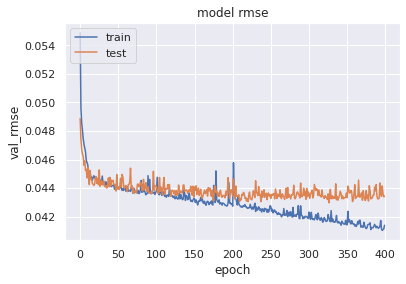

0.041394155472517014 0.04343167692422867


In [8]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # create and fit the LSTM network
# model = Sequential()
# model.add(Bidirectional(GRU(30),input_shape = (6,1)))
# model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
# model.add(Dense(64,activation = None))
# model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
# model.add(Dense(1,activation = 'gelu'))
# reduce_lr = ReduceLROnPlateau(monitor='loss', mode ='min',factor=0.4,
#                               patience=10, min_lr=0.000000001)
# checkpoint_filepath = '/content/temp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_root_mean_squared_error',
#     mode='min',
#     save_best_only=True)

# model.compile(loss=tf.keras.losses.MeanSquaredError(),
#               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0006),
#               metrics=['RootMeanSquaredError'])
# print(model.summary())
# history = model.fit(train_X, train_y,callbacks = [model_checkpoint_callback],validation_split=0.3, epochs=400, verbose=0)
# plt.plot(history.history['root_mean_squared_error'])
# plt.plot(history.history['val_root_mean_squared_error'])
# plt.title('model rmse')
# plt.ylabel('val_rmse')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# print(history.history['root_mean_squared_error'][-1],history.history['val_root_mean_squared_error'][-1])

## Model results and testing

In [27]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Models/model_2day')

In [19]:
# model.load_weights(checkpoint_filepath)

In [28]:
# Model prediction
temp= model.predict(test_X)
temp[temp<0]=0

#Results Stats
import math
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score#R square

mse = mean_squared_error(test_y,temp)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y,temp)
r2 = r2_score(test_y,temp)
norm_rmse = rmse/(float(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min()))

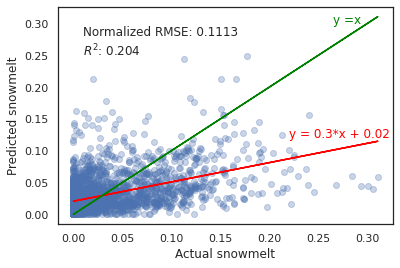

In [34]:
#Visualization of results
plt.scatter(test_y,temp,cmap = 'virdis',alpha = 0.3)
m, b = np.polyfit(test_y, temp, 1)
# Slope and intercept of polyfit line
slope = float(m)
intercept = float(b)

plt.xlabel('Actual snowmelt')
plt.ylabel('Predicted snowmelt')
plt.plot(test_y, m*test_y + b,color = 'red')
plt.plot(test_y, 1*test_y + 0,color = 'green')
plt.text(0.01,0.25, 'Normalized RMSE: '+str(np.round(norm_rmse,4))+'\n$R^2$: '+str(np.round(r2,3)))
plt.text(0.22,0.12, 'y = '+str(round(slope,2))+'*x + '+str(round(intercept,2)),color = 'red',fontsize = 12)
plt.text(0.265,0.3, 'y =x',fontsize = 12,color = 'green')
plt.savefig('2_day_graph.tif',dpi = 300)
plt.show()

In [32]:
print('MSE:',mse,'\nRMSE:',rmse,'\nMAE:',mae,'\nR2:',r2,'\nNormalized RMSE:',norm_rmse,'\nSlope:',m,'\nIntercept:',b)

MSE: 0.0016561749681097376 
RMSE: 0.04069612964533283 
MAE: 0.026914727637463373 
R2: 0.2039543700207439 
Normalized RMSE: 0.11130955580860259 
Slope: [0.30340937] 
Intercept: [0.02071093]


In [23]:
# model.save('/content/drive/MyDrive/Models/model_2day')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/model_2day/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/model_2day/assets
